> # Inroduction

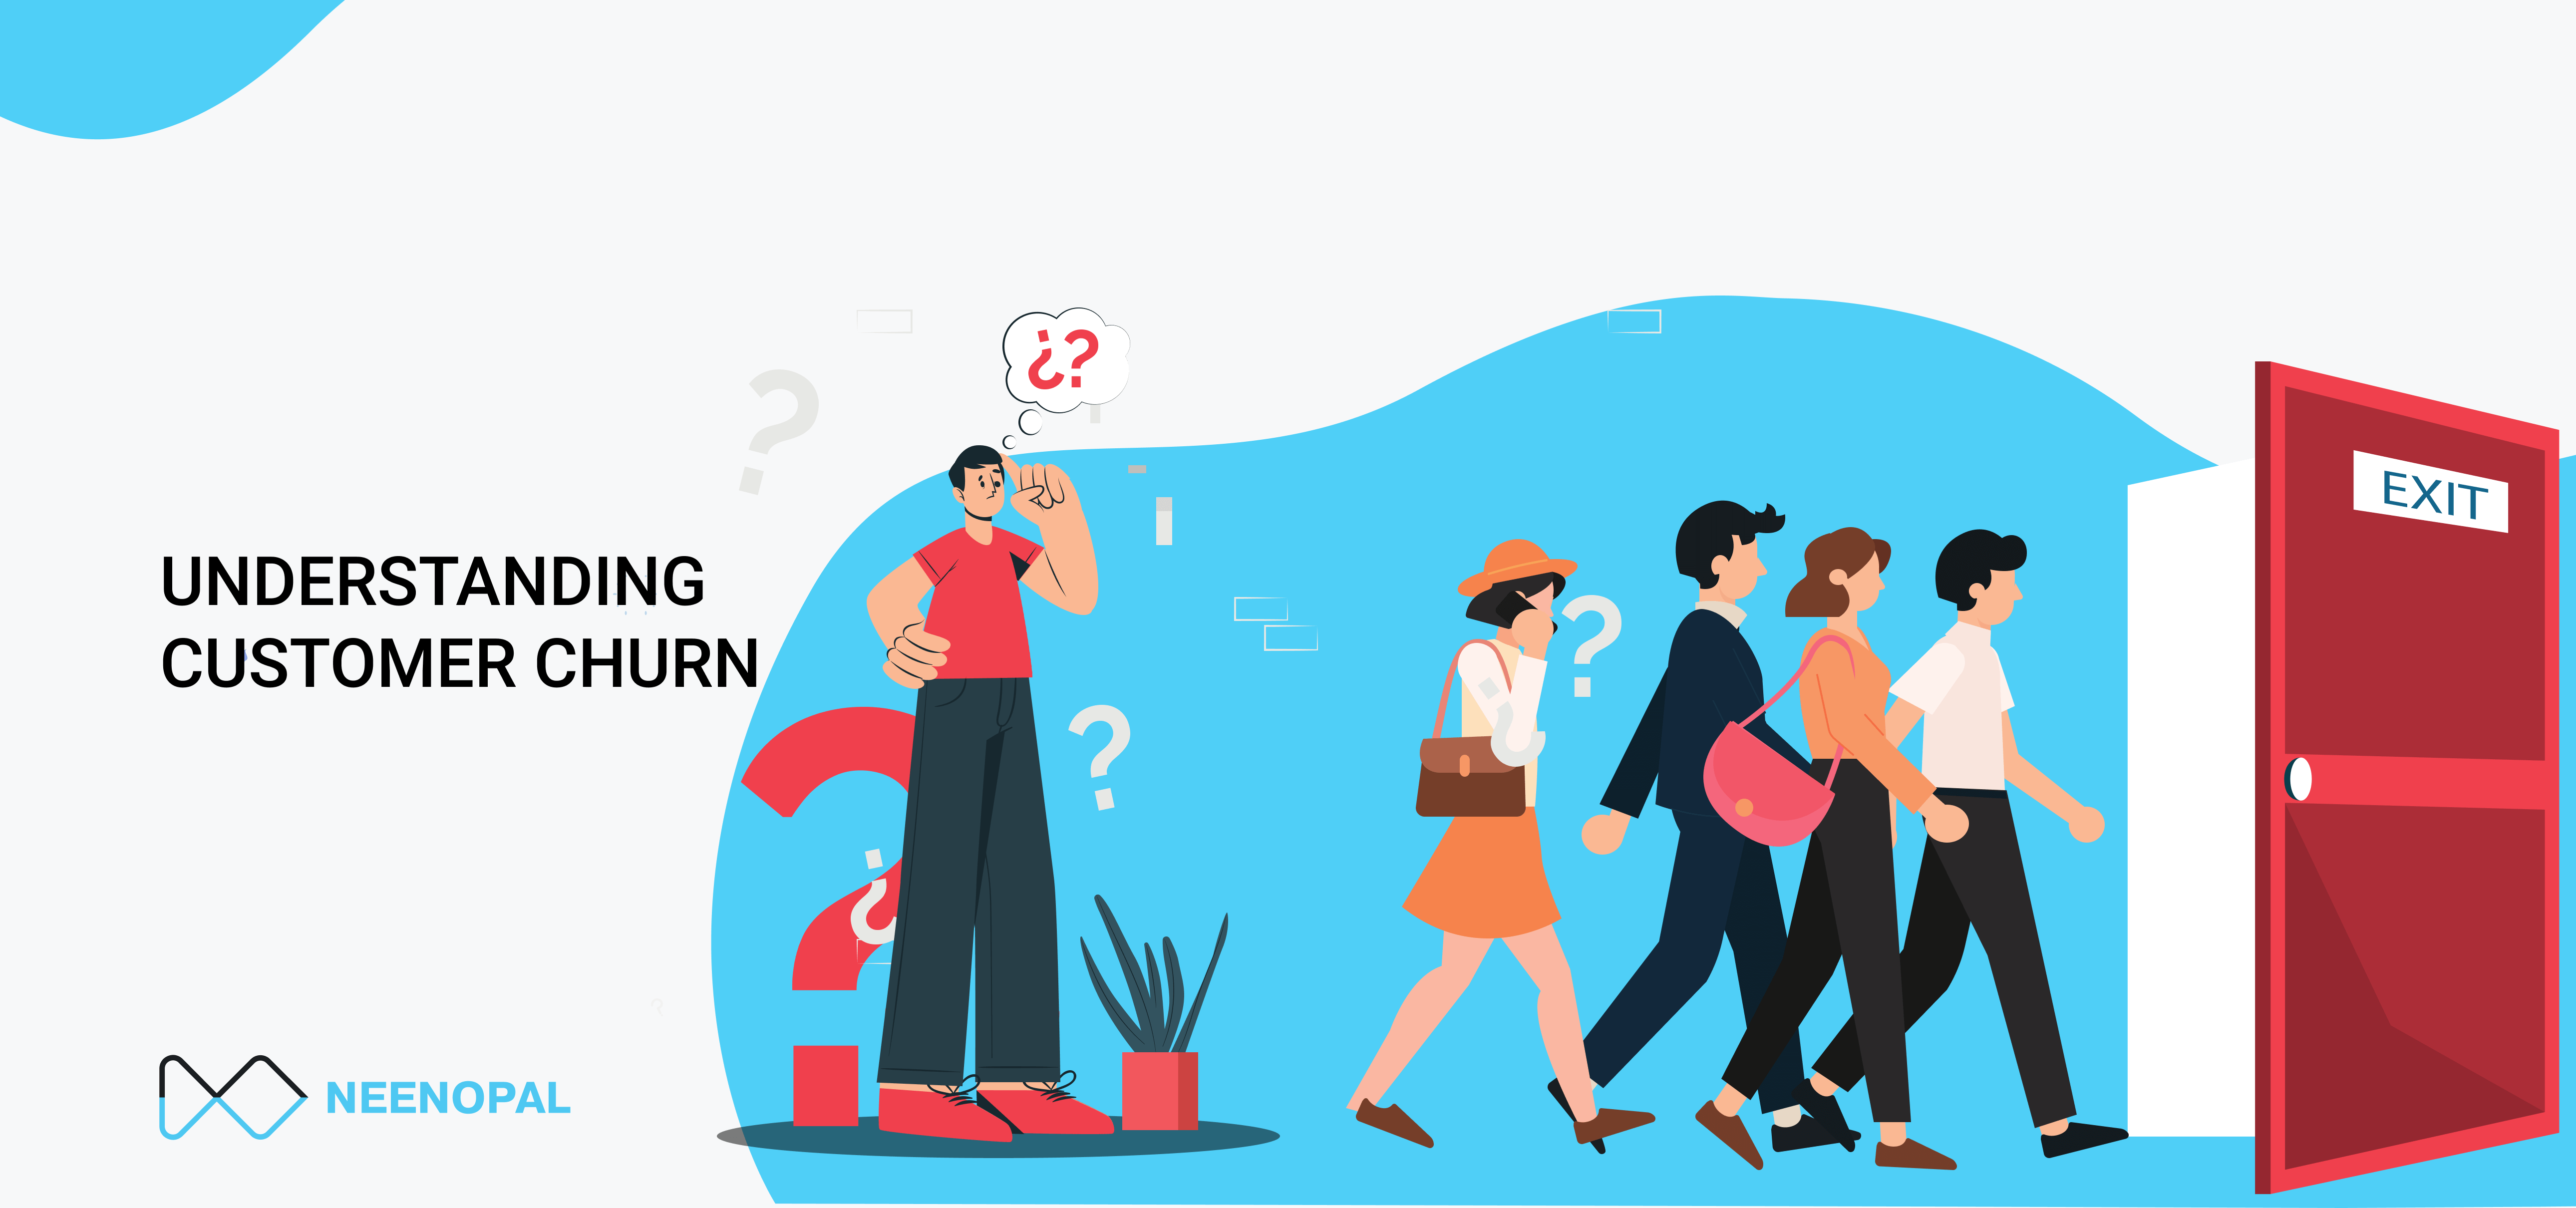

This is a Telco company which provides some services to its customers,
some customers have left, and we are here to analyze the case and figure out the reasons behind thier churn using the provided features.

# About the Data set:
- **Customers who left within the last month** – the column is called Churn


- **Services that each customer has signed up for** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- **Customer account information** – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges


- **Demographic info about customers** – gender, age range, and if they have partners and dependents


> # Importing libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

> # Reading the dataset:

In [3]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


> # Data Exploration:


In [4]:
df.shape

(7043, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df["SeniorCitizen"].unique()

array([0, 1], dtype=int64)

0 ==> Not a senior citizen

1 ==> is a senior citizen

In [7]:
df["TotalCharges"].unique()

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

> # Data Cleaning:

In [8]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.duplicated().sum()

0

convert senior ciizen values:
- 1: "yes"
- 0: "no"

In [10]:
df["SeniorCitizen"] = df["SeniorCitizen"].replace(1,"yes")
df["SeniorCitizen"] = df["SeniorCitizen"].replace(0,"no")


In [11]:
df["SeniorCitizen"].unique()

array(['no', 'yes'], dtype=object)

correct the data type of "TotalCharges"

In [12]:
df["TotalCharges"]

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [13]:
# df["TotalCharges"] = df["TotalCharges"].astype(float)

In [14]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

In [15]:
df["TotalCharges"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [16]:
df["TotalCharges"].isnull().sum()

11

we found some missing values here, this is so small ratio to the data size and the were lost completly at random, so dropping them will not affect the data analysis.

In [17]:
df.dropna(subset=["TotalCharges"], inplace=True)

In [18]:
df["TotalCharges"].isnull().sum()

0

> # Explratory Data Anlysis:

In [19]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### What is the overall churn rate in company?

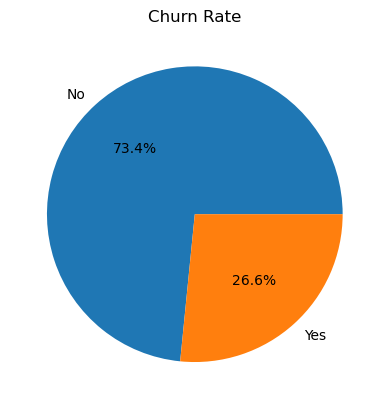

In [20]:
churn_rate = df["Churn"].value_counts()
plt.pie(churn_rate.values, labels= churn_rate.index, autopct="%1.1f%%")
plt.title("Churn Rate")
plt.show()

**Insight:** around a quarter of the customers left in last month

### What is the gender ratio in the company?

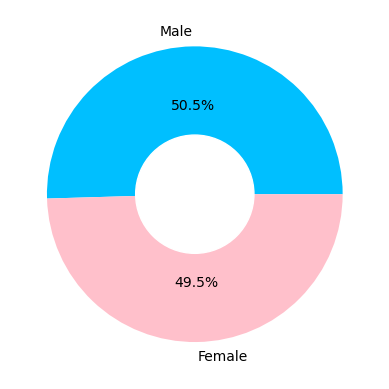

In [21]:
gender_rate = df["gender"].value_counts()
# Create a pieplot
plt.pie(gender_rate.values, labels= gender_rate.index,colors=["deepskyblue", "pink"] , autopct="%1.1f%%")

# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

they are about the same ratio

### How dose gender affect churn rate? is there a significant difference between males and females churn rate?

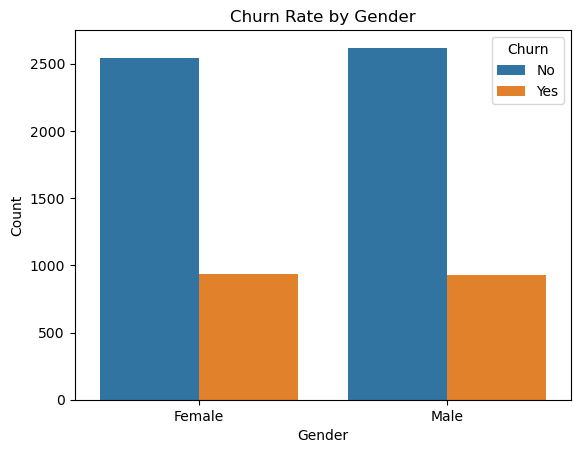

In [22]:
sns.countplot(x = "gender", hue="Churn", data= df)
plt.title("Churn Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Insight**: they are to close ratio, then it's obvious that there's no specific gender that most likely to leave than the other

### Dose being a senior citizen influence the likelihood of churn?

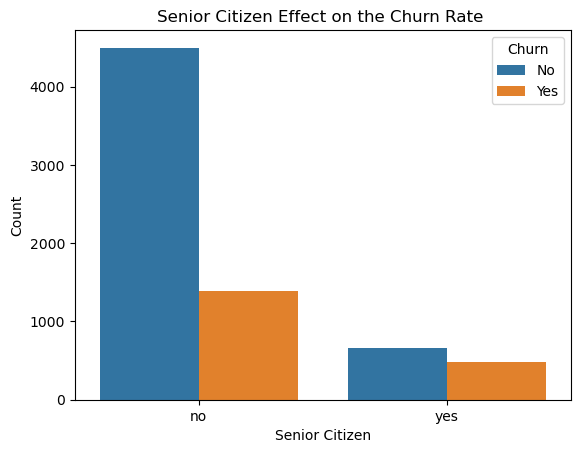

In [23]:
sns.countplot(x = "SeniorCitizen", hue="Churn", data= df)
plt.title("Senior Citizen Effect on the Churn Rate ")
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.show()


it can be noticed that even though the ratio of senior citizens among the customers is lower, the likelihood of churn is high for senior citizens compared to non-senior citizens, but there's also a high chance that some senior citizens won't churn,

### How much charges do the custmoers mostly pay?

Text(0.5, 0, 'Total Charges')

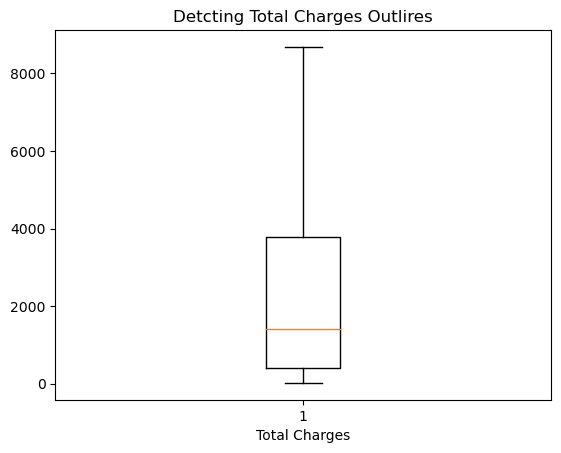

In [24]:
plt.boxplot(df["TotalCharges"])
plt.title("Detcting Total Charges Outlires")
plt.xlabel("Total Charges")

Text(0.5, 0, 'Total Charges')

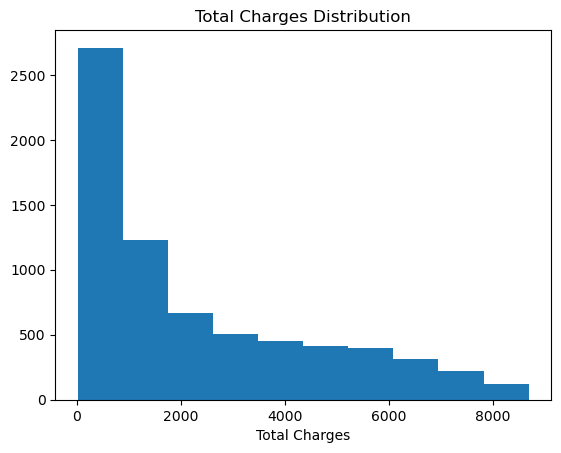

In [25]:
plt.hist(df["TotalCharges"])
plt.title("Total Charges Distribution")
plt.xlabel("Total Charges")

**Insight:** as it appears it has a skewed distribution, which refers to most of our customers pay less than 2000 charges, The number of customers decreases when it comes to hight charges.

In [26]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Are customers with parteners less likely to churn compared to those without parteners?

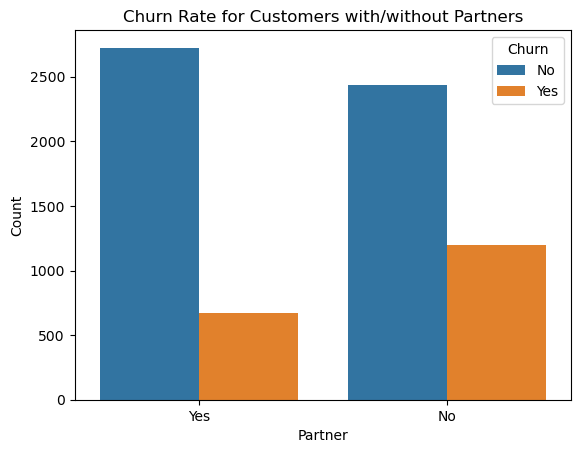

In [27]:
sns.countplot(x= "Partner", hue= "Churn", data =df)
plt.title('Churn Rate for Customers with/without Partners')
plt.xlabel("Partner")
plt.ylabel("Count")
plt.show()

Based on the visualization, it can be noticed that even though the ratio of the customers without parteners is lower, the likelihood of churn is high for them compared to customers with parteners

In [28]:
df["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

### Dose having dependents affect the churn rate?

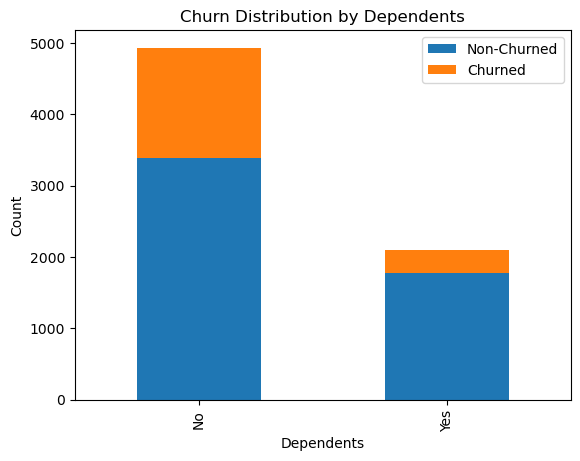

In [29]:
df_grouped = df.groupby(["Dependents", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", stacked=True)
plt.title("Churn Distribution by Dependents")
plt.xlabel("Dependents")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

it's noted that most of our customers don't have dependents, and they also more likely to leave compared to customers with dependents

### Is there a correleation between tenure and churn rate?

In [30]:
df["tenure"].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26, 39], dtype=int64)

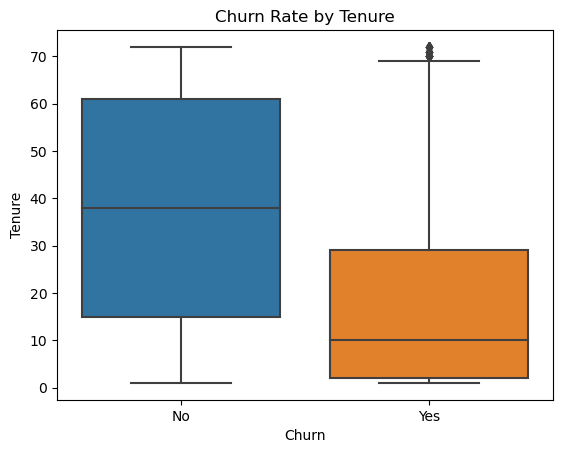

In [31]:
sns.boxplot(x= "Churn", y="tenure", data = df)
plt.title("Churn Rate by Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()


- it appears that The shorter the duration customers spend with the company  the higher their chances of churning

- the avarage tunre rate is about 10 years


### Dose the presence or absence of phone service impact churn behavior?

In [32]:
df["PhoneService"].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

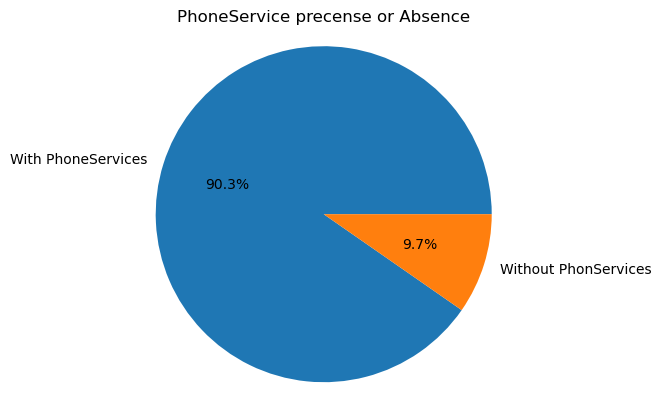

In [33]:
phone_values = df["PhoneService"].value_counts().values
labels = ["With PhoneServices", "Without PhonServices"]
sizes = [6352, 680]
plt.pie(sizes, labels= labels, autopct="%1.1f%%")
plt.axis("equal")
plt.title("PhoneService precense or Absence")
plt.show()

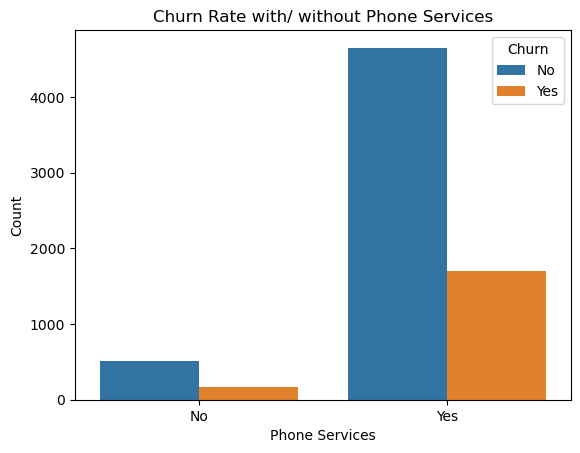

In [34]:
sns.countplot(x= "PhoneService", hue="Churn", data= df)
plt.title("Churn Rate with/ without Phone Services")
plt.xlabel("Phone Services")
plt.ylabel("Count")
plt.show()

- Based on the visualization the largest portion of our customers have phone services

- and i see they are fair ratio of the churn rate between having or not having this service, as it's not the main effect of churning

### How dose having multiple lines or not affect the curn rate?

In [35]:
df["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

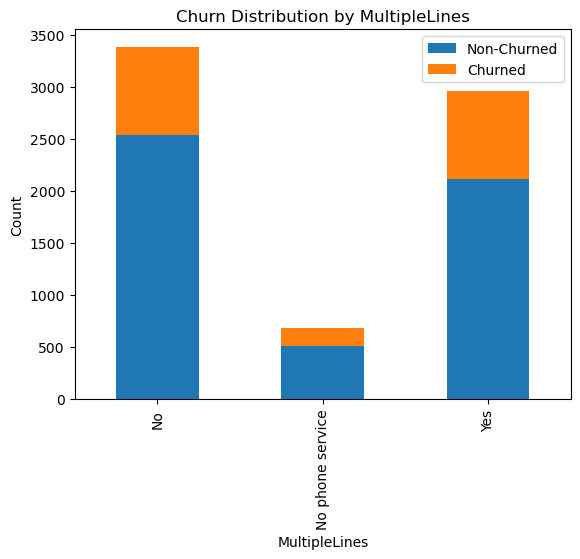

In [36]:
df_grouped = df.groupby(["MultipleLines", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", stacked=True)
plt.title("Churn Distribution by MultipleLines")
plt.xlabel("MultipleLines")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

- The portion of the customers who have phone service but without multiple lines is alittle higher than who have multiple lines
- some customers don't even have phone service to have mulitiple lines or not
- It appears that there's no significant diffference churning rate between customers with Multiple lines of the phone service and those without it

### Which internet Service Provider has the highest churn rate?

In [37]:
df["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

Text(0.5, 1.0, 'Chur Rate by Internet Service')

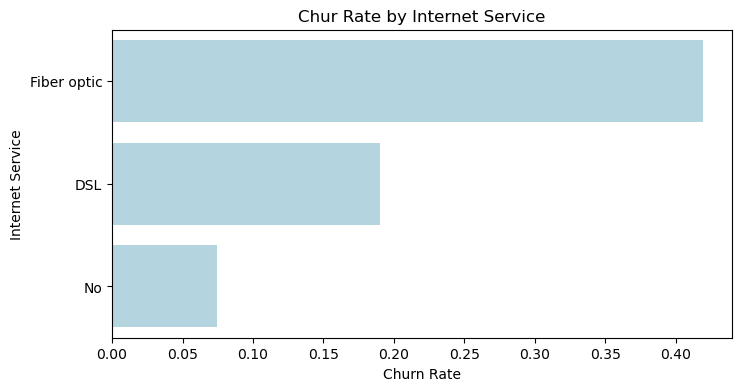

In [38]:
df["Churn_N"] = df["Churn"].map({"Yes":1, "No": 0})
internet_churn = df.groupby("InternetService")["Churn_N"].mean().reset_index()
internet_churn = internet_churn.sort_values("Churn_N", ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x="Churn_N", y="InternetService", data= internet_churn, color = "lightblue")
plt.xlabel("Churn Rate")
plt.ylabel("Internet Service")
plt.title("Chur Rate by Internet Service")

In [39]:
df["Churn"].unique()

array(['No', 'Yes'], dtype=object)

Based on the visualization, it seems that the highest portion of churning custers were using Fiber Optic as an internet service provider

In [40]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_N'],
      dtype='object')

### Do customers with online security tend to churn less frequently?


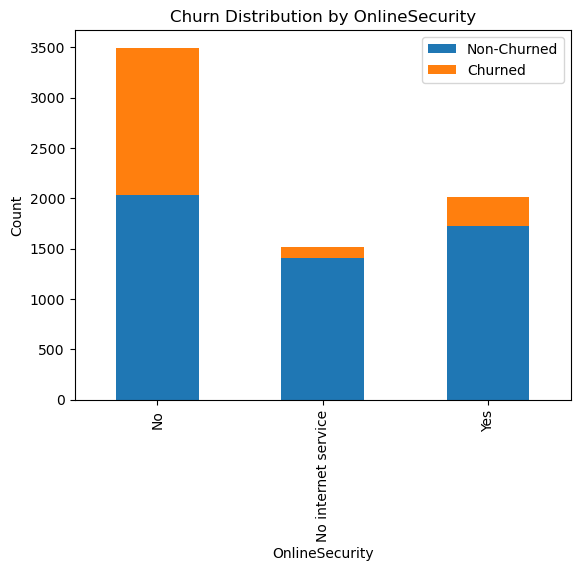

In [41]:
df_grouped = df.groupby(["OnlineSecurity", "Churn"]).size().unstack()
df_grouped.plot(kind= "bar", stacked=True)
plt.title("Churn Distribution by OnlineSecurity")
plt.xlabel("OnlineSecurity")
plt.ylabel("Count")
plt.legend(["Non-Churned", "Churned"])

- The larger ratio of the customers don't have Online security service, and it appears that they tend to churn more than the customers with online security

---------------------

# Draft:
Features that have an influence on the churn rate:
- SeniorCitizen: yes
- Partner: no
- Dependents: no
- tenure: low tunuea
- InternetService: fiber optic
- OnlineSecurity: no



Features that don't have an influence on the churn rate:
- Gender
-PhoneService
- MultipleLines


